In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

api_key = '8da72c11842b2fa73e8cd1ffab6dcb37'
city = 'London'
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"

# Send GET request
response = requests.get(url)
data = response.json()

In [3]:
# Extract required weather information
temperature = data['main']['temp']
humidity = data['main']['humidity']
wind_speed = data['wind']['speed']
description = data['weather'][0]['description']

# Show clean output
print(f"City: {city}")
print(f"Temperature: {temperature}°C")
print(f"Humidity: {humidity}%")
print(f"Wind Speed: {wind_speed} m/s")
print(f"Weather Description: {description}")

City: London
Temperature: 11.2°C
Humidity: 70%
Wind Speed: 2.2 m/s
Weather Description: scattered clouds


In [4]:
# Create DataFrame for plotting
weather_df = pd.DataFrame({
    "Parameter": ["Temperature (°C)", "Humidity (%)", "Wind Speed (m/s)"],
    "Value": [temperature, humidity, wind_speed]
})

weather_df


,Parameter,Value
0,Temperature (°C),11.2
1,Humidity (%),70.0
2,Wind Speed (m/s),2.2


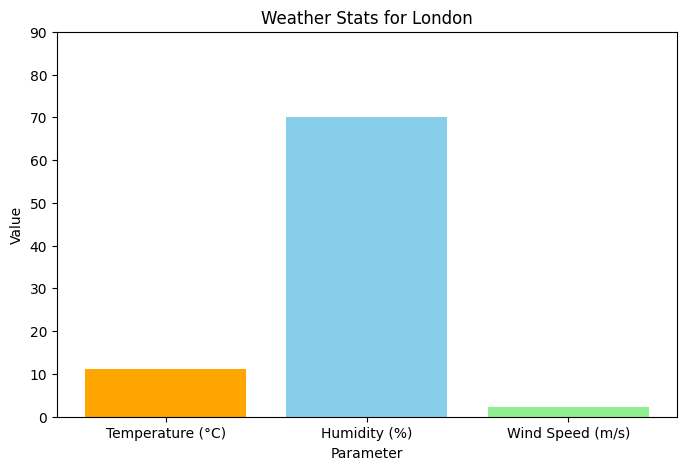

In [5]:
plt.figure(figsize=(8,5))
plt.bar(weather_df["Parameter"], weather_df["Value"], color=['orange', 'skyblue', 'lightgreen'])
plt.title(f"Weather Stats for {city}")
plt.ylabel("Value")
plt.xlabel("Parameter")
plt.ylim(0, max(weather_df["Value"]) + 20)
plt.show()

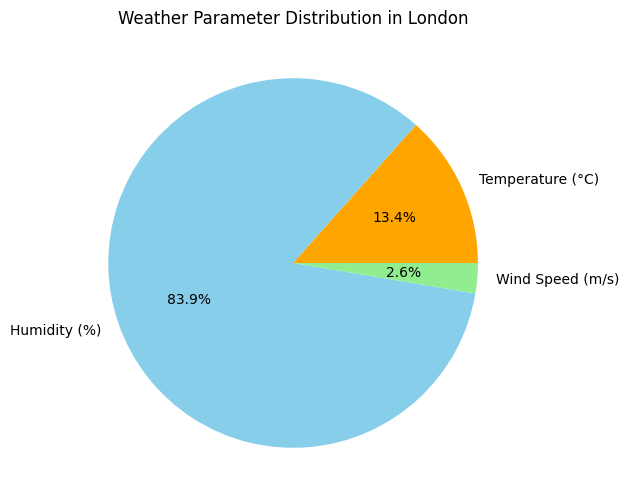

In [6]:
plt.figure(figsize=(6,6))
plt.pie(weather_df["Value"], labels=weather_df["Parameter"], autopct='%1.1f%%', colors=['orange', 'skyblue', 'lightgreen'])
plt.title(f"Weather Parameter Distribution in {city}")
plt.show()